In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


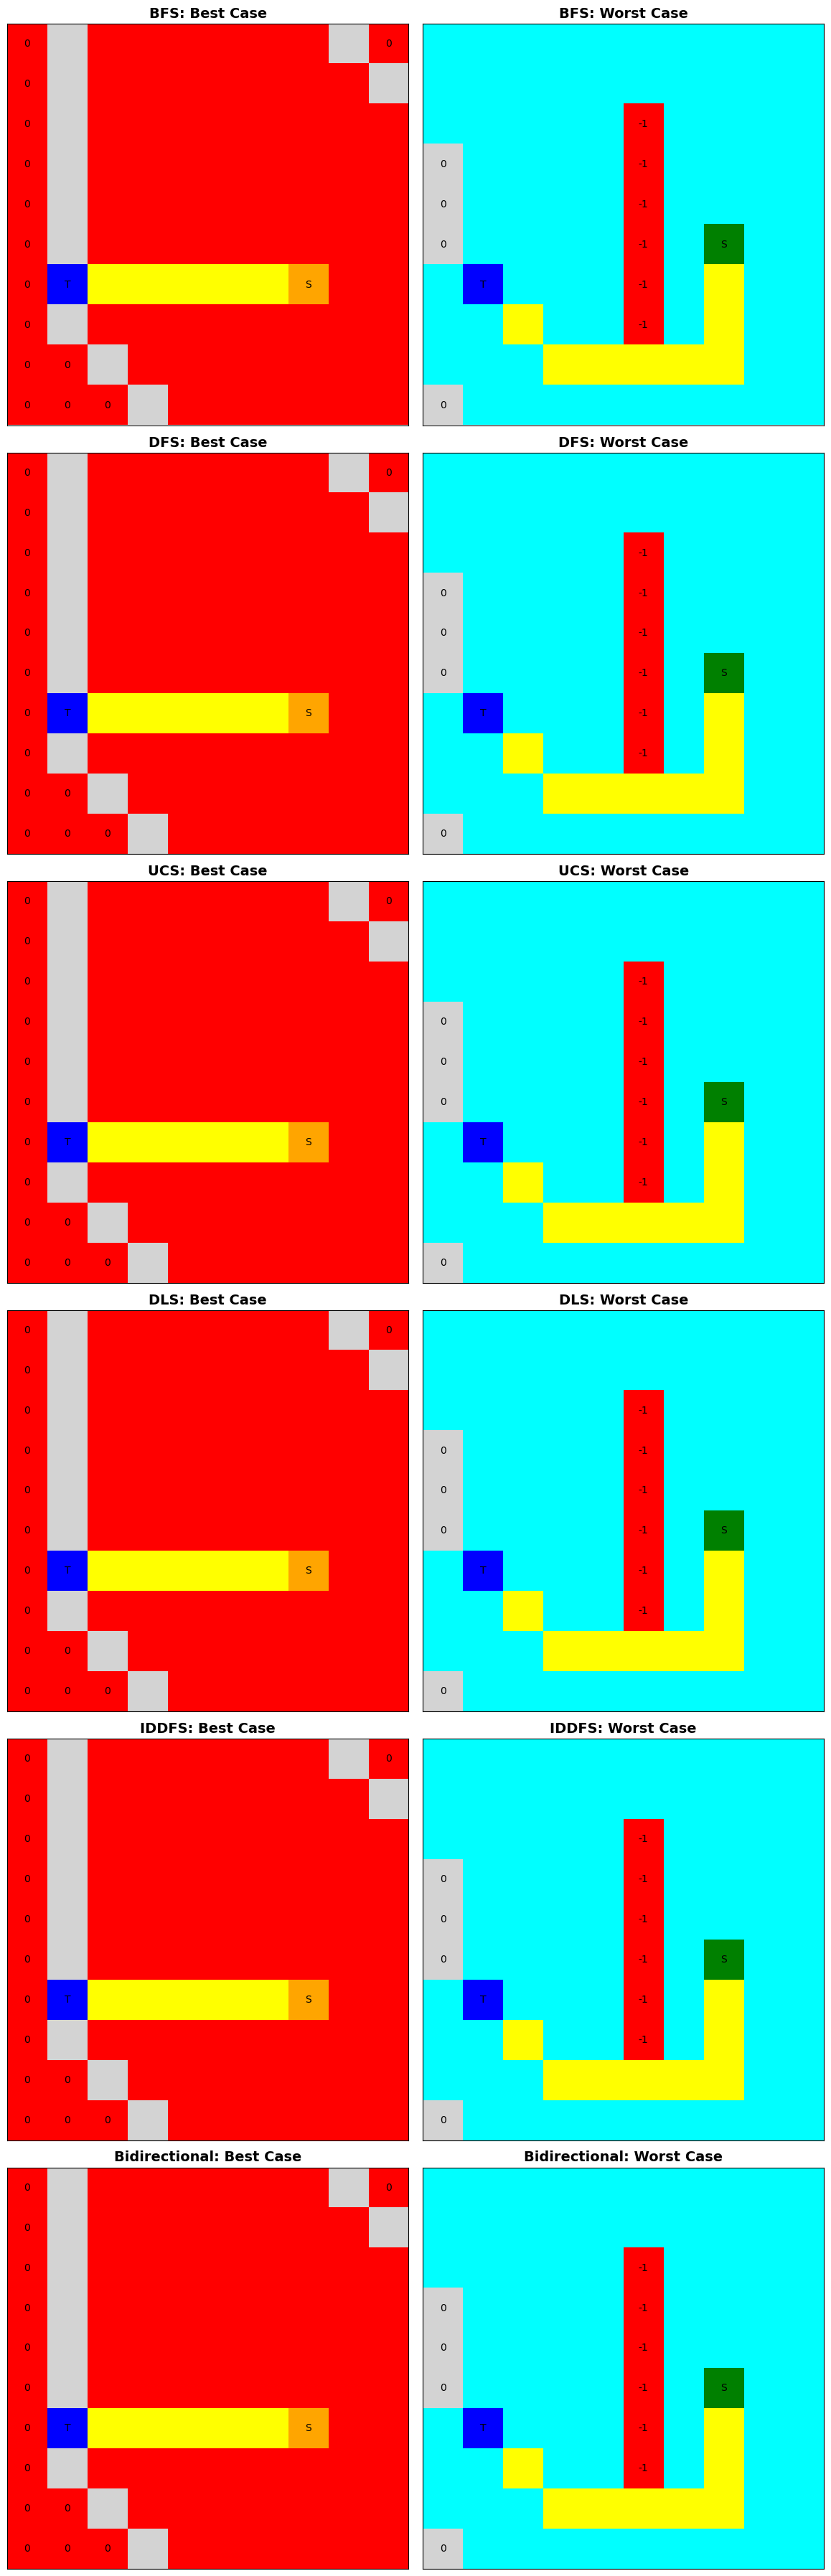

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import deque

# SETTINGS
N = 10
MOVES = [(-1,0), (0,1), (1,0), (1,1), (0,-1), (-1,-1)]

# UPDATED COLOR MAP [cite: 134-138]
# -1: Red(Wall), 0: Gray(Empty), 0.5: Cyan(Explored), 0.7: Orange(Frontier), 2: Green(S), 3: Blue(T), 4: Yellow(Path)
colors_list = ["red", "lightgray", "cyan", "orange", "green", "blue", "yellow"]
cmap = ListedColormap(colors_list)

# SCENARIOS [cite: 55-58]
def get_scenarios():
    grid_a = np.zeros((N,N))
    s_a, t_a = (6,7), (6,1)
    
    grid_b = np.zeros((N,N))
    grid_b[2:8,5] = -1
    s_b, t_b = (5,7), (6,1)
    
    return [(grid_a, s_a, t_a, "Best Case"), (grid_b, s_b, t_b, "Worst Case")]

# BFS SOLVER
def solve_bfs(grid, start, target):
    grid = grid.copy()
    queue = deque([start])
    visited = {start}
    parent = {start: None}
    
    while queue:
        curr = queue.popleft()
        if curr == target:
            break
            
        if curr != start:
            grid[curr] = 0.5  # Mark as EXPLORED [cite: 41, 171]
            
        for dx, dy in MOVES:
            nx, ny = curr[0]+dx, curr[1]+dy
            if 0<=nx<N and 0<=ny<N and grid[nx,ny]!=-1 and (nx,ny) not in visited:
                visited.add((nx,ny))
                parent[(nx,ny)] = curr
                queue.append((nx,ny))
                
                # Mark as FRONTIER [cite: 40, 170]
                if (nx,ny) != target:
                    grid[nx,ny] = 0.7  # Use 0.7 to map to Orange color
    
    # Trace path from target to start [cite: 145]
    curr = target
    while curr:
        if curr != start and curr != target:
            grid[curr] = 4 # FINAL PATH [cite: 138]
        curr = parent.get(curr)
    
    grid[start] = 2
    grid[target] = 3
    return grid

# PLOT GRIDS [cite: 169]
algos = ["BFS","DFS","UCS","DLS","IDDFS","Bidirectional"]
fig, axes = plt.subplots(6,2, figsize=(12,36))

for i, algo in enumerate(algos):
    for j, (grid_orig, start, target, name) in enumerate(get_scenarios()):
        result = solve_bfs(grid_orig, start, target)
        ax = axes[i,j]
        
        # Mapping values to match colormap indices: -1, 0, 0.5, 0.7, 2, 3, 4
        # We use vmin and vmax to ensure the colors align with our list
        ax.imshow(result, cmap=cmap) 
        ax.set_title(f"{algo}: {name}", fontsize=14, fontweight='bold')
        
        for r in range(N):
            for c in range(N):
                val = result[r,c]
                if val == 2: label="S"
                elif val == 3: label="T"
                elif val == -1: label="-1"
                elif val == 0: label="0"
                else: label="" # Numbers only on walls and empty cells [cite: 65-87]
                ax.text(c,r,label, ha='center', va='center', fontsize=10, color='black')
        
        ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()